# [ 220207 ] scikit learn exercise
---
1. iris datasets

In [1]:
from sklearn.datasets import load_iris
# load_iris??

In [2]:
data=load_iris()
print(type(data))
print(dir(data))
print(data.feature_names)

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
from IPython.display import HTML
HTML(data.DESCR.replace('\n','<br/>'))

---
2. digits dataset

In [4]:
from sklearn.datasets import load_digits
digits=load_digits()

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

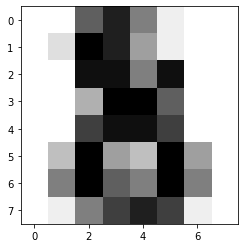

In [7]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r)

---
3. housing data

In [8]:
import os
import tarfile
from six.moves import urllib

d_root='https://raw.githubusercontent.com/ageron/handson-ml/master/'
h_pth=os.path.join('datasets','housing')
h_url=d_root+'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=h_url,housing_pth=h_pth):
    if not os.path.isdir(housing_pth):
        os.makedirs(housing_pth)
    tgz_pth=os.path.join(housing_pth,'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_pth)
    housing_tgz = tarfile.open(tgz_pth)
    housing_tgz.extractall(path=housing_pth)
    housing_tgz.close()

fetch_housing_data()

In [9]:
import pandas as pd
def load_housing_data(housing_pth=h_pth):
    csv_path = os.path.join(housing_pth, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


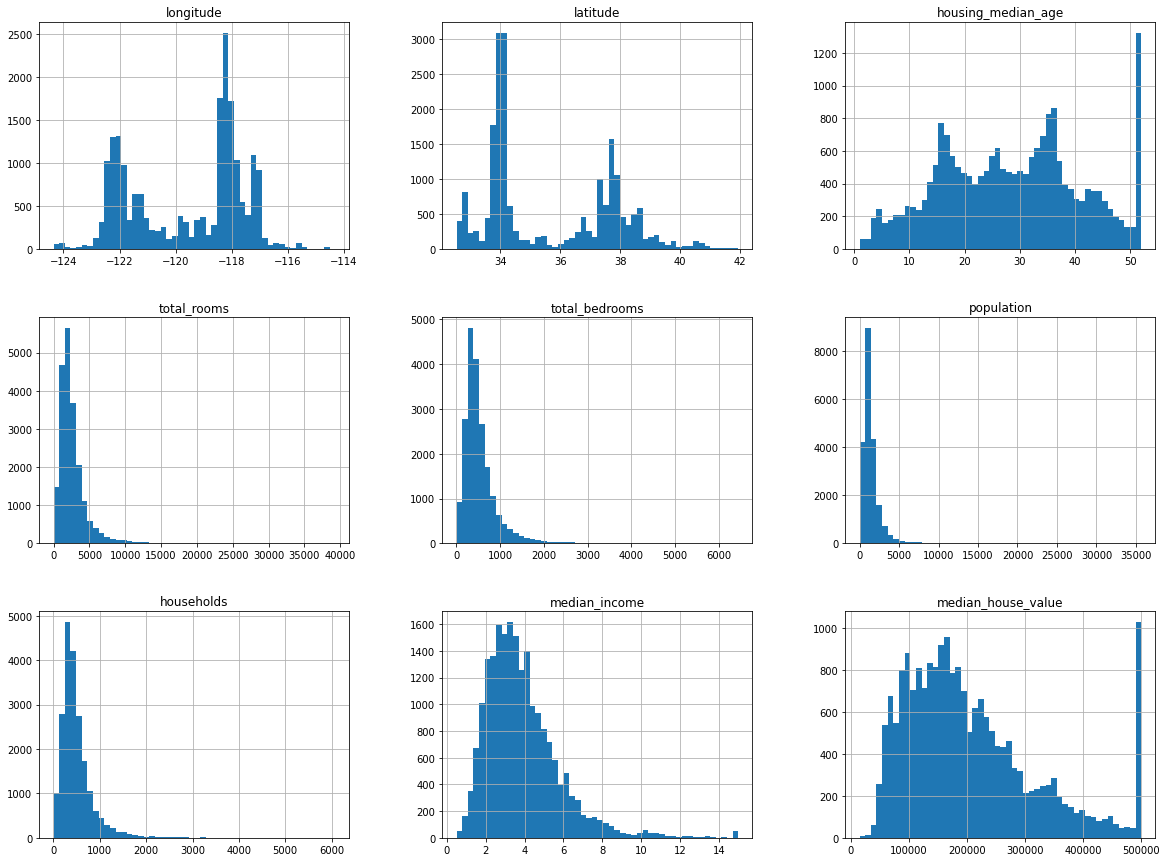

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
import pandas as pd
housing.to_csv('./datasets/housing/housing.csv')

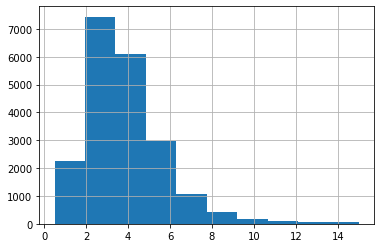

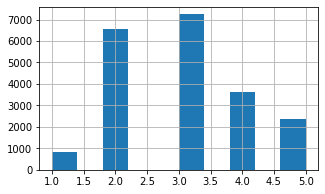

In [14]:
import numpy as np
housing["median_income"].hist()
# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, 
inplace=True)

housing["income_cat"].value_counts()

import matplotlib.pyplot as plt
fig = plt.figure(figsize =(5,3))
housing["income_cat"].hist()
fig.savefig('./datasets/housing/income_category_hist') 

---
4. 표준화

In [15]:
from sklearn.preprocessing import scale, robust_scale,minmax_scale,maxabs_scale
import numpy as np

x=(np.arange(10,dtype=np.float)-3).reshape(-1,1)
x

C:\Users\kk135\AppData\Local\Temp/ipykernel_4688/2988016446.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=(np.arange(10,dtype=np.float)-3).reshape(-1,1)


array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.]])

In [16]:
import pandas as pd
df=pd.DataFrame(np.hstack([x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)]),
               columns=['x','scale(x)','robust(x)','minmax(x)','maxabs(x)'])
df

,x,scale(x),robust(x),minmax(x),maxabs(x)
0,-3.0,-1.566699,-1.000000,0.000000,-0.500000
1,-2.0,-1.218544,-0.777778,0.111111,-0.333333
2,-1.0,-0.870388,-0.555556,0.222222,-0.166667
3,0.0,-0.522233,-0.333333,0.333333,0.000000
4,1.0,-0.174078,-0.111111,0.444444,0.166667
5,2.0,0.174078,0.111111,0.555556,0.333333
6,3.0,0.522233,0.333333,0.666667,0.500000
7,4.0,0.870388,0.555556,0.777778,0.666667
8,5.0,1.218544,0.777778,0.888889,0.833333
9,6.0,1.566699,1.000000,1.000000,1.000000


In [17]:
from sklearn.datasets import load_iris
iris=load_iris()
d1=iris.data
d2=scale(iris.data)

print('old_mean:',np.mean(d1,axis=0))
print('old std', np.std(d1,axis=0))
print('new_mean',np.mean(d2,axis=0))
print('new_std', np.std(d2,axis=0))

old_mean: [5.84333333 3.05733333 3.758      1.19933333]
old std [0.82530129 0.43441097 1.75940407 0.75969263]
new_mean [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
new_std [1. 1. 1. 1.]


C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


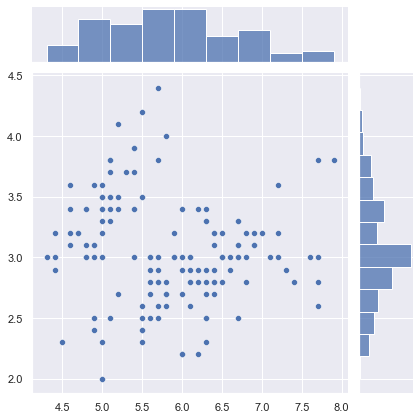

C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


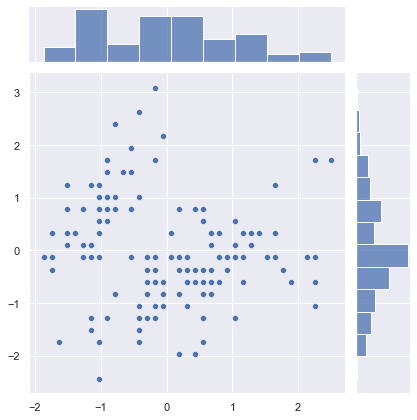

In [18]:
import seaborn as sns
sns.set()
sns.jointplot(d1[:,0],d1[:,1])
plt.show()
sns.jointplot(d2[:,0],d2[:,1])
plt.show()

C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


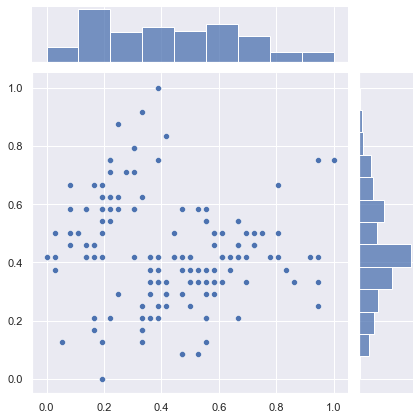

In [19]:
d4=minmax_scale(d1)
sns.jointplot(d4[:,0],d4[:,1])
plt.show()

---
5. normalization

In [20]:
from sklearn.preprocessing import scale,normalize
y1=scale(x)
y2=normalize(x)
print('original x\n',x)
print('scale\n',y1)
print('norms\n',np.linalg.norm(y1,axis=1))
print('normalize\n',y2)
print('norms\n',np.linalg.norm(y2,axis=1))

original x
 [[-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]
scale
 [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
norms
 [1.5666989  1.21854359 0.87038828 0.52223297 0.17407766 0.17407766
 0.52223297 0.87038828 1.21854359 1.5666989 ]
normalize
 [[-1.]
 [-1.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
norms
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


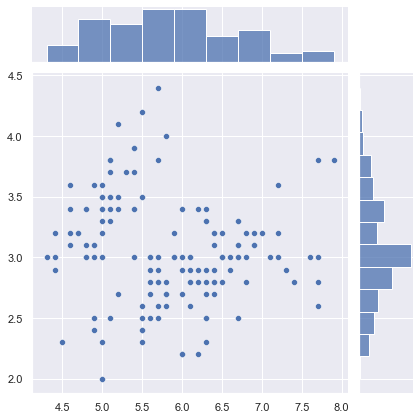

C:\Users\kk135\Anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


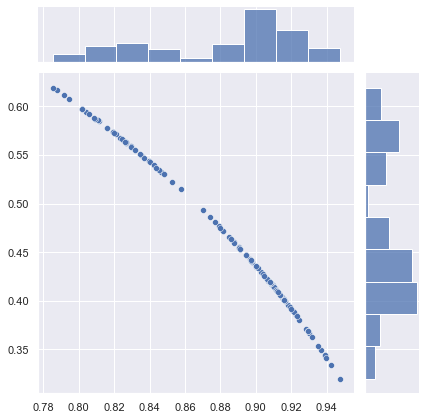

In [21]:
d1=iris.data[:,:2]
d3=normalize(d1)
sns.jointplot(d1[:,0],d1[:,1])
plt.show()
sns.jointplot(d3[:,0],d3[:,1])
plt.show()

In [22]:
from sklearn.preprocessing import FunctionTransformer
def all_but_first_column(x):
    return x[:,:1]
x=np.arange(12).reshape(4,3)
print(x)
y=FunctionTransformer(all_but_first_column).fit_transform(x)
print(y)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0]
 [3]
 [6]
 [9]]


In [23]:
def all_but_first_column(x):
    return x*.5
x=np.arange(12).reshape(4,3)
print(x)
y=FunctionTransformer(all_but_first_column).fit_transform(x)
print(y)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0.  0.5 1. ]
 [1.5 2.  2.5]
 [3.  3.5 4. ]
 [4.5 5.  5.5]]
